**Data Source =** [Cotton Plant Disease Prediction](https://drive.google.com/drive/folders/1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue)

**Loading Libraries**

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator # expand the size of training datasets
from keras.optimizers import Adam # Compiling CNN Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

**Loading Data**

In [2]:
training_path = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/train"
validation_path = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/val"

**Generating Training Dataset**

In [25]:
training_datagenerator = ImageDataGenerator(rescale=1./255,
                                            rotation_range= 40,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range= 0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True,
                                            fill_mode='nearest') # return images with different angle of single image

In [26]:
training_data = training_datagenerator.flow_from_directory( training_path, 
                                           target_size=(150, 150),
                                           batch_size=32,
                                           class_mode='categorical') # input images are of different size, we need images of same sizes (150,150)

Found 1961 images belonging to 4 classes.


In [5]:
valid_datagenerator = ImageDataGenerator(rescale=1./255)

In [27]:
valid_data = valid_datagenerator.flow_from_directory( validation_path,
                                           target_size=(150, 150),
                                           batch_size=32,
                                           class_mode='categorical')

Found 324 images belonging to 4 classes.


**Class Index**

In [8]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

**Plotting Images**

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Same Images but with different Variation/Angles

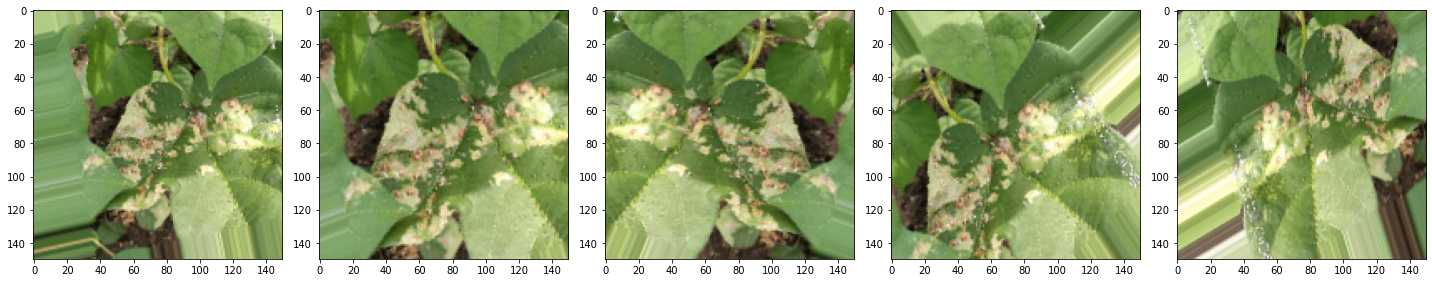

In [10]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

**Building CNN Model**

In [11]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

**Compiling CNN Model**

In [12]:
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [30]:
model_path = '/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/cotton_plant_disease_predictor.h5'

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/500
62/62 [==============================] - 55s 881ms/step - loss: 1.3113 - accuracy: 0.4038 - val_loss: 1.1071 - val_accuracy: 0.4938

Epoch 00001: val_accuracy improved from -inf to 0.49383, saving model to /content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/cotton_plant_disease_predictor.h5
Epoch 2/500
62/62 [==============================] - 25s 403ms/step - loss: 1.0777 - accuracy: 0.5281 - val_loss: 1.0880 - val_accuracy: 0.5370

Epoch 00002: val_accuracy improved from 0.49383 to 0.53704, saving model to /content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/cotton_plant_disease_predictor.h5
Epoch 3/500
62/62 [==============================] - 25s 405ms/step - loss: 0.9729 - accuracy: 0.5791 - val_loss: 0.9357 - val_accuracy: 0.6019

Epoch 00003: val_accuracy improved from 0.53704 to 0.60185, saving model to /content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/cotton_plant_disease_predictor.h5
Epoch 4/500
62/62 [==============================] - 25

**Testing the Prediction Model**

Importing Libraries

In [22]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Importing Trained Model

In [16]:
model_path = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/cotton_plant_disease_predictor.h5"
trained_model = keras.models.load_model(model_path)

Loading Test Images

In [15]:
fl1 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/fresh cotton leaf/d (122)_iaip.jpg"
fl2 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/fresh cotton leaf/d (133)_iaip.jpg"
fl3 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/fresh cotton leaf/d (198)_iaip.jpg"
fl4 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/fresh cotton leaf/d (220)_iaip.jpg"

dl1 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/diseased cotton leaf/dis_leaf (124).jpg"
dl2 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg"
dl3 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg"
dl4 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg"

fp1 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/fresh cotton plant/dsd (140)_iaip.jpg"
fp2 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/fresh cotton plant/dsd (153)_iaip.jpg"
fp3 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/fresh cotton plant/dsd (160)_iaip.jpg"
fp4 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/fresh cotton plant/dsd (195)_iaip.jpg"

dp1 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/diseased cotton plant/dd (16)_iaip.jpg"
dp2 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/diseased cotton plant/dd (176)_iaip.jpg"
dp3 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/diseased cotton plant/dd (188)_iaip.jpg"
dp4 = "/content/drive/MyDrive/DeepLearning/CNN/Agriculture_Datasets/test/test/diseased cotton plant/dd (21)_iaip.jpg"


In [20]:
def pred_fresh_disease(model, fresh_plant_disease):
  test_image = image.load_img(fresh_plant_disease, target_size = (150,150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis =0)

  result = model.predict(test_image).round(3)

  pred= np.argmax(result)
  print(result, "--->>", pred)


  if pred == 0:
    print('Predicted--->> Disease Cotton Leaf')
  if pred == 1:
      print('Predicted--->> Disease Cotton Plant')
  if pred == 2:
      print('Predicted--->> Fresh Cotton Leaf')
  else:
      print('Predicted--->> Fresh Cotton Plant')

Predicting the Model

In [23]:
for fresh_plant_disease in [fl1,fl2,fl3,fl4,fp1,fp2,fp3,fp4,dl1,dl2,dl3,dl4,dp1,dp2,dp3,dp4]:
  pred_fresh_disease(trained_model, fresh_plant_disease)

[[0. 0. 1. 0.]] --->> 2
Predicted--->> Fresh Cotton Leaf
[[0. 0. 1. 0.]] --->> 2
Predicted--->> Fresh Cotton Leaf
[[0.    0.    0.999 0.   ]] --->> 2
Predicted--->> Fresh Cotton Leaf
[[0.003 0.    0.997 0.   ]] --->> 2
Predicted--->> Fresh Cotton Leaf
[[0. 0. 0. 1.]] --->> 3
Predicted--->> Fresh Cotton Plant
[[0. 0. 0. 1.]] --->> 3
Predicted--->> Fresh Cotton Plant
[[0. 0. 0. 1.]] --->> 3
Predicted--->> Fresh Cotton Plant
[[0.    0.002 0.    0.998]] --->> 3
Predicted--->> Fresh Cotton Plant
[[1. 0. 0. 0.]] --->> 0
Predicted--->> Disease Cotton Leaf
Predicted--->> Fresh Cotton Plant
[[0.991 0.    0.009 0.   ]] --->> 0
Predicted--->> Disease Cotton Leaf
Predicted--->> Fresh Cotton Plant
[[1. 0. 0. 0.]] --->> 0
Predicted--->> Disease Cotton Leaf
Predicted--->> Fresh Cotton Plant
[[1. 0. 0. 0.]] --->> 0
Predicted--->> Disease Cotton Leaf
Predicted--->> Fresh Cotton Plant
[[0. 1. 0. 0.]] --->> 1
Predicted--->> Disease Cotton Plant
Predicted--->> Fresh Cotton Plant
[[0.    0.968 0.    0.032]